In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('../datasets/diabetes.csv')
# only use first 2 features
X = df.drop(columns = 'Outcome')[ ['Glucose', 'BloodPressure'] ]
y = df['Outcome']
X.shape

(768, 2)

In [3]:
scaler = StandardScaler()
scaler.fit(X)
X_transformed = scaler.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, stratify = y, random_state=42)

In [4]:
model = svm.SVC(kernel="linear", probability=True)
model.fit(X_train, y_train)
acc_score = accuracy_score(model.predict(X_train), y_train)
print(f"Accuracy score for train data is {acc_score}")
acc_score = accuracy_score(model.predict(X_test), y_test)
print(f"Accuracy score for test data is {acc_score}")

Accuracy score for train data is 0.757328990228013
Accuracy score for test data is 0.7142857142857143


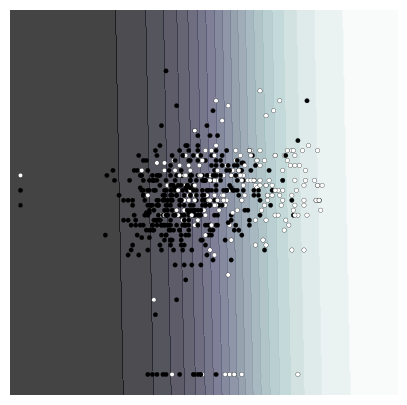

In [5]:
X = X_train
Y = y_train
classifier = model

def plot_probability_surface(classifier, levels=20, points=True):
    xx, yy = np.meshgrid(np.linspace(-4, 4, 300), np.linspace(-4,4, 300))
    Z = classifier.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    Z = Z.reshape(xx.shape)
    fig, axis = plt.subplots(1, 1, figsize=(5, 5))
    axis.contourf(xx, yy, Z, alpha=0.75, cmap='bone', vmin=0, vmax=1, levels=levels)
    if points:
        axis.scatter(X[:, 0], X[:, 1], c=Y, s=10,
                    cmap='bone', edgecolors='black', linewidth=0.2)
    axis.axis('off')
    return axis

ax = plot_probability_surface(classifier)